In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

# Dataset choice

## Dataset 1

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/with_mask dataset/first_approach/tina_detections/with_mask.json for_folder

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/without_mask dataset/first_approach/tina_detections/without_mask.json for_folder

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/incorrect_mask dataset/first_approach/tina_detections/incorrect_mask.json for_folder

In [17]:
import json
with open("dataset/first_approach/tina_detections/with_mask.json") as file:
    mask_face = json.load(file)

with open("dataset/first_approach/tina_detections/without_mask.json") as file:
    nonmask_face = json.load(file)

with open("dataset/first_approach/tina_detections/incorrect_mask.json") as file:
    incorrect_face = json.load(file)    

In [49]:
many_faces = []
faces_count = []
lots_faces = []
photo_size = []
faces_size = []
face_perc_area = []
for cat in [mask_face, nonmask_face, incorrect_face]:
    for i in range(len(cat)):
        img = cat[str(i)]
        faces_no = len(img["objects"])
        faces_count.append(faces_no)
        filename = img["filename"]
        image = cv.imread(filename)
        img_size = image.shape[0]*image.shape[1]
        photo_size.append(img_size**0.5) 
        for j in range(faces_no):
            bbox = img["objects"][str(j)]["coordinates"]
            face_size = (int(float(bbox["x_max"])) - int(float(bbox["x_min"])))*(int(float(bbox["y_max"])) - int(float(bbox["y_min"])))
            faces_size.append(face_size**0.5)
            face_perc_area.append(100*face_size/img_size)
        if faces_no > 1:
            many_faces.append(filename)
            if faces_no >= 4:
                lots_faces.append(filename)

In [32]:
sns.set(font_scale=1.0)

In [52]:
photo_size = [size/10**3 for size in photo_size]

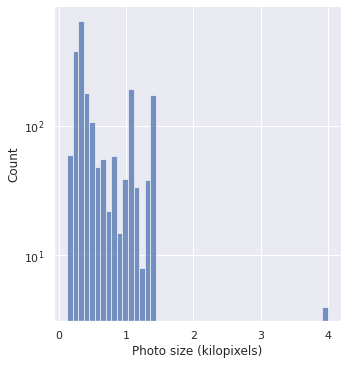

In [63]:
fig = sns.displot(photo_size)
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Photo size (kilopixels)')
fig

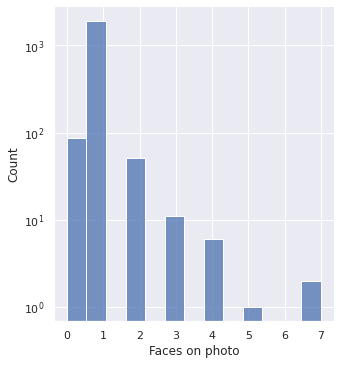

In [60]:
fig = sns.displot(faces_count)
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Faces on photo')
fig

In [56]:
faces_size = [size/10**3 for size in faces_size]

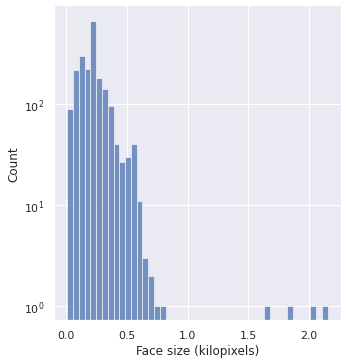

In [66]:
fig = sns.displot(faces_size, bins=int((len(faces_size))**(0.5)))
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Face size (kilopixels)')
fig

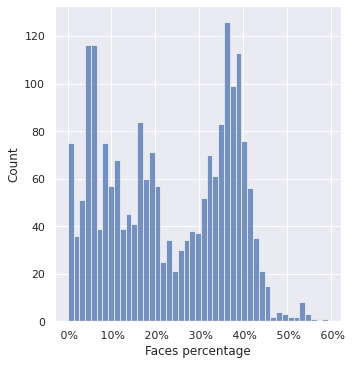

In [70]:
import matplotlib.ticker as tkr
fig = sns.displot(face_perc_area, bins=int((len(face_perc_area))**(0.5)))
for ax in fig.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x: .0f}%'))
    ax.set(xlabel='Faces percentage')
fig

In [80]:
mask_filenames = []
for i in range(len(mask_face)):
    photo = mask_face[str(i)]
    mask_filenames.append(photo['filename'])

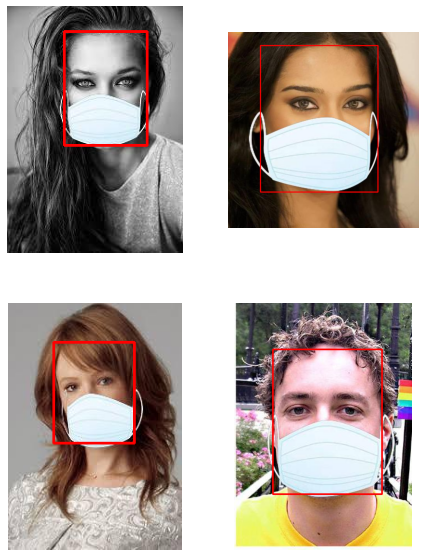

In [121]:
fig=plt.figure(figsize=(7.5, 10))
axes = []
j = 0
for k in range(len(mask_face)):
    file_results = mask_face[str(k)]
    img = cv.imread(file_results["filename"])
    if img.shape[1] < img.shape[0]:
        for i in range(len(file_results["objects"])):
            xmin = int(float((file_results["objects"][str(i)]["coordinates"]["x_min"])))
            xmax = int(float((file_results["objects"][str(i)]["coordinates"]["x_max"])))
            ymin = int(float((file_results["objects"][str(i)]["coordinates"]["y_min"])))
            ymax = int(float((file_results["objects"][str(i)]["coordinates"]["y_max"])))
            cv.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        axes.append(fig.add_subplot(2, 2, j+1))
        j += 1
        plt.axis('off')
        plt.imshow(img)
        if j == 4:
            break

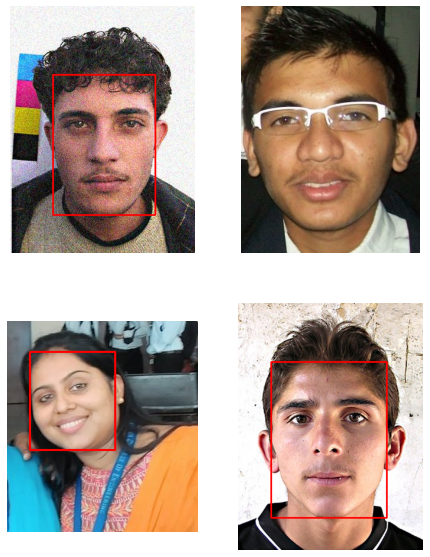

In [122]:
fig=plt.figure(figsize=(7.5, 10))
axes = []
j = 0
for k in range(len(nonmask_face)):
    file_results = nonmask_face[str(k)]
    img = cv.imread(file_results["filename"])
    if img.shape[1] < img.shape[0]:
        for i in range(len(file_results["objects"])):
            xmin = int(float((file_results["objects"][str(i)]["coordinates"]["x_min"])))
            xmax = int(float((file_results["objects"][str(i)]["coordinates"]["x_max"])))
            ymin = int(float((file_results["objects"][str(i)]["coordinates"]["y_min"])))
            ymax = int(float((file_results["objects"][str(i)]["coordinates"]["y_max"])))
            cv.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        axes.append(fig.add_subplot(2, 2, j+1))
        j += 1
        plt.axis('off')
        plt.imshow(img)
        if j == 4:
            break

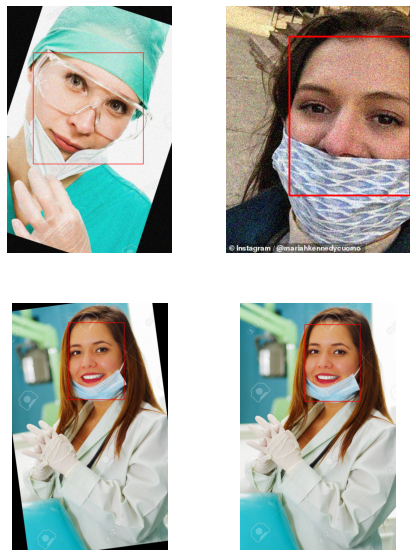

In [123]:
fig=plt.figure(figsize=(7.5, 10))
axes = []
j = 0
for k in range(len(incorrect_face)):
    file_results = incorrect_face[str(k)]
    img = cv.imread(file_results["filename"])
    if img.shape[1] < img.shape[0]:
        for i in range(len(file_results["objects"])):
            xmin = int(float((file_results["objects"][str(i)]["coordinates"]["x_min"])))
            xmax = int(float((file_results["objects"][str(i)]["coordinates"]["x_max"])))
            ymin = int(float((file_results["objects"][str(i)]["coordinates"]["y_min"])))
            ymax = int(float((file_results["objects"][str(i)]["coordinates"]["y_max"])))
            cv.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        axes.append(fig.add_subplot(2, 2, j+1))
        j += 1
        plt.axis('off')
        plt.imshow(img)
        if j == 4:
            break

# Facial landmarks detection

## MTCNN

In [ ]:
from mtcnn.mtcnn import MTCNN
filename = "dataset/second_approach/images/maksssksksss10.png"
img = cv.imread(filename)
detector = MTCNN()

faces = detector.detect_faces(img)

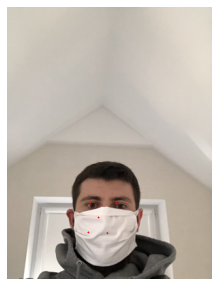

In [192]:
fig=plt.figure(figsize=(5, 5))
for face in faces:
    if face["confidence"] > 0.5:
        for keypoint in face["keypoints"]:
            x, y = face["keypoints"][keypoint]
            img = cv.circle(img, (x, y), radius=1, color=(0, 0, 255), thickness=-1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

## Dlib

In [193]:
img = cv.imread(filename)

In [194]:
import dlib

detector = dlib.get_frontal_face_detector()
faces = detector(img, 1)

In [196]:
predictor = dlib.shape_predictor("models/shape_predictor_68_face_landmarks.dat")

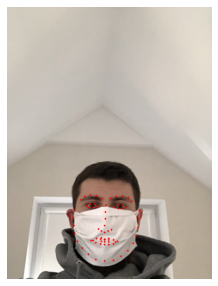

In [197]:
fig=plt.figure(figsize=(5, 5))
for face in faces:
    landmarks = predictor(img, face)

    for n in range(0,68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        img = cv.circle(img, (x, y), 1, (0, 0, 255), -1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

## RetinaFace

In [211]:
import mxnet as mx
import insightface

retina_detector = insightface.model_zoo.get_model('retinaface_r50_v1')
retina_detector.prepare(ctx_id = -1, nms=0.4)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [212]:
img = cv.imread(filename)
bbox, landmarks = retina_detector.detect(img, threshold=0.5, scale=1.0)

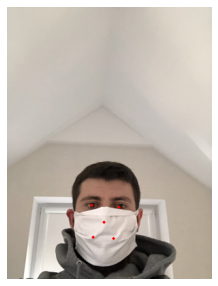

In [213]:
for landmark_set in landmarks:
    for (x,y) in landmark_set:
        img = cv.circle(img, (int(x), int(y)), 2, (0, 0, 255), -1)

fig=plt.figure(figsize=(5, 5))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

## 3DDFA

In [214]:
import importlib
import yaml
import matplotlib.pyplot as plt

FaceBoxes = importlib.import_module('3DDFA_V2.FaceBoxes.FaceBoxes')
mod_TDDFA = importlib.import_module('3DDFA_V2.TDDFA')
TDDFA = getattr(mod_TDDFA, "TDDFA")
mod_functions = importlib.import_module('3DDFA_V2.utils.functions')
draw_landmarks = getattr(mod_functions, "draw_landmarks")
mod_render = importlib.import_module('3DDFA_V2.utils.render')
render = getattr(mod_render, "render")
mod_depth = importlib.import_module('3DDFA_V2.utils.depth')
depth = getattr(mod_depth, "depth")
# load config
cfg = yaml.load(open('3DDFA_V2/configs/mb1_120x120.yml'), Loader=yaml.SafeLoader)

# Init FaceBoxes and TDDFA, recommend using onnx flag
onnx_flag = True  # or True to use ONNX to speed up
if onnx_flag:
    import os
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    os.environ['OMP_NUM_THREADS'] = '4'
    
    mod_FaceBoxesONNX = importlib.import_module('3DDFA_V2.FaceBoxes.FaceBoxes_ONNX')
    FaceBoxes_ONNX = getattr(mod_FaceBoxesONNX, "FaceBoxes_ONNX")
    mod_TDDFA_ONNX = importlib.import_module('3DDFA_V2.TDDFA_ONNX')
    TDDFA_ONNX = getattr(mod_TDDFA_ONNX, "TDDFA_ONNX")
    
    face_boxes = FaceBoxes_ONNX()
    tddfa = TDDFA_ONNX(**cfg)
else:
    tddfa = TDDFA(gpu_mode=False, **cfg)
    face_boxes = FaceBoxes()

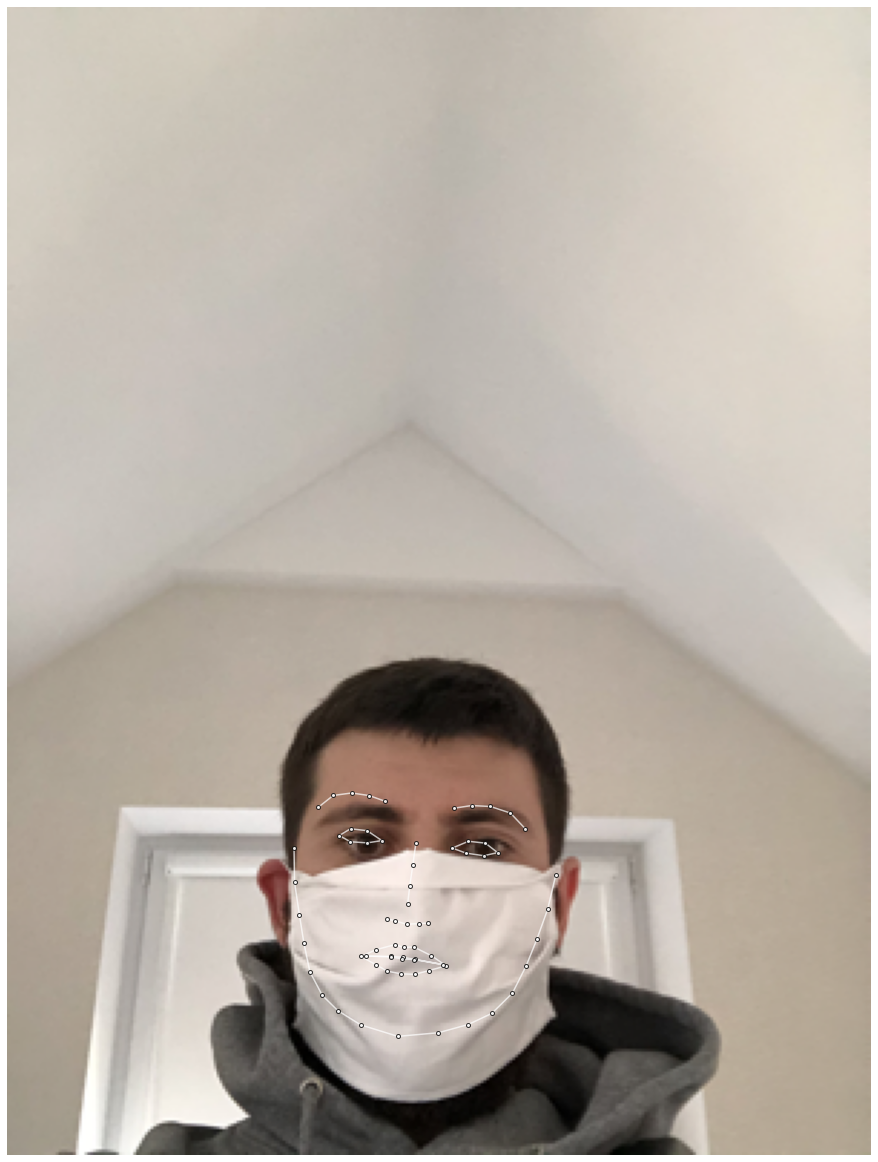

In [215]:
img = cv.imread(filename)
dense_flag = False

boxes = face_boxes(img)
param_lst, roi_box_lst = tddfa(img, boxes)
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, dense_flag=dense_flag)

## OpenCV's Haarcascades (?)

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/second_approach/images/maksssksksss521.png dataset/trial/out_nomask.png landmarks

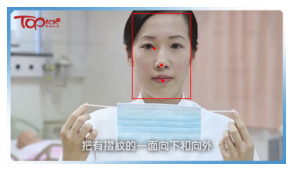

In [36]:
img = cv.imread("dataset/trial/out_nomask.png")
fig=plt.figure(figsize=(5, 5))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/second_approach/images/maksssksksss10.png dataset/trial/out_mask.png landmarks

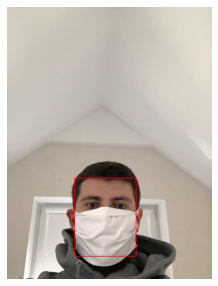

In [39]:
img = cv.imread("dataset/trial/out_mask.png")
fig=plt.figure(figsize=(5, 5))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)